In [7]:
from IPython.display import Image # type: ignore
from google.cloud import vision_v1 as vision
import io
import pandas as pd
import os

from PIL import Image

from scipy.spatial import KDTree
from webcolors import hex_to_rgb
from webcolors import CSS3_HEX_TO_NAMES

In [26]:
# Activate Google vision API using service account key
client = vision.ImageAnnotatorClient.from_service_account_json("vision-api.json")
image = vision.types.Image()

In [6]:
def change_format(img: str) -> str:
    """Change image format from .avif to .png"""
    im = Image.open(img) # type: ignore
    new_image: str = f'{img}.png'
    im.save(new_image, 'JPEG')
    return new_image

File: ./images-test/ipad.avif.png


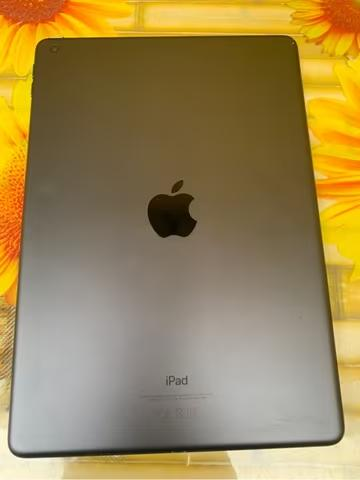

Labels:
Netbook, Gadget, Yellow, Communication Device, Amber, Computer, Granny smith, Font, Material property, Display device



In [17]:
# Import the picture
pics = ["./images-test/ipad.avif"]

for pic in pics:
    pic = change_format(pic)
    print("=" * 79)
    print("File:", pic)
    display(Image.open(pic)) # type: ignore

    with io.open(pic, "rb") as image_file:
        parse = image_file.read()

    query_label_detection = {"image": {"content": parse},
             "features": [{"type_": "LABEL_DETECTION"}]}

    response_label_detection = client.annotate_image(query_label_detection)
    

    # Label detection
    labels = response_label_detection.label_annotations
    print("Labels:")
    if labels:
        for index, label in enumerate(labels):
            if index != len(labels) - 1:
                print(label.description, end = ", ")
            else:
                print(label.description, end = "\n\n")
    else:
        print("[None]", end = "\n\n")

File: ./images-test/ipad.avif.png


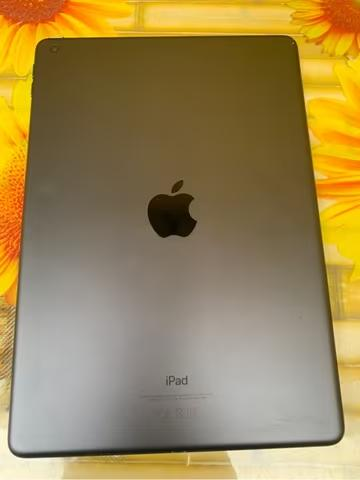

Number of objects found: 1
Tablet computer (Confidence: 0.9640557169914246)
  Normalized bounding polygon vertices: 
  • (0.007676109671592712, 0.049717675894498825)
  • (0.972373902797699, 0.049717675894498825)
  • (0.972373902797699, 0.9470899701118469)
  • (0.007676109671592712, 0.9470899701118469)


In [19]:
# Import the picture
pics = ["./images-test/ipad.avif.png"]

for pic in pics:
    print("=" * 79)
    print("File:", pic)
    display(Image.open(pic)) # type: ignore
    
    with io.open(pic, "rb") as image_file:
        parse = image_file.read()
    
    query_object_localization = {"image": {"content": parse},
             "features": [{"type_": "OBJECT_LOCALIZATION"}]}
    
    response_object_localization = client.annotate_image(query_object_localization)
    
    # Object Localization detection
    if objects := response_object_localization.localized_object_annotations:
        print(f"Number of objects found: {len(objects)}")
        for obj in objects:
            print(f"{obj.name} (Confidence: {obj.score})")
            print("  Normalized bounding polygon vertices: ")
            for vertex in obj.bounding_poly.normalized_vertices:
                print(f"  • ({vertex.x}, {vertex.y})")
    else:
        print("[None]")


File: ./images-test/ipad.avif.png


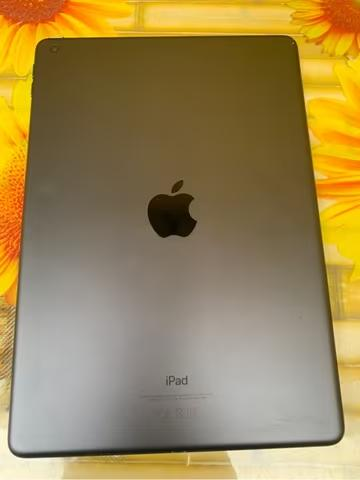

Texts:
"iPad"
  • Text Bounds: (165,375), (186,375), (186,384), (165,384)
"iPad"
  • Text Bounds: (165,375), (186,375), (186,384), (165,384)




In [20]:
# Import the picture

for pic in pics:
    print("=" * 79)
    print("File:", pic)
    display(Image.open(pic)) # type: ignore

    with io.open(pic, "rb") as image_file:
        parse = image_file.read()

    query = {"image": {"content": parse},
             "features": [{"type_": "TEXT_DETECTION"}]}

    response_text_detection = client.annotate_image(query)

    # Text detection
    texts = response_text_detection.text_annotations
    print("Texts:")
    if texts:
        for text in texts:
            print(f'\"{text.description}\"')
            vertices = [
                f"({vertex.x},{vertex.y})"
                for vertex in text.bounding_poly.vertices
            ]
            print(f'  • Text Bounds: {", ".join(vertices)}')
        print("\n")
    else:
        print("[None]", end = "\n\n")

In [27]:
def detect_logos(path):
    """Detects logos in the file."""
    display(Image.open(pic)) # type: ignore

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    query = {"image": {"content": content},
            "features": [{"type_": "LOGO_DETECTION"}]}

    response_logo_detection = client.annotate_image(query)

    logos = response_logo_detection.logo_annotations
    print('Logos:')

    for logo in logos:
        print(logo.description)

    if response_logo_detection.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response_logo_detection.error.message))

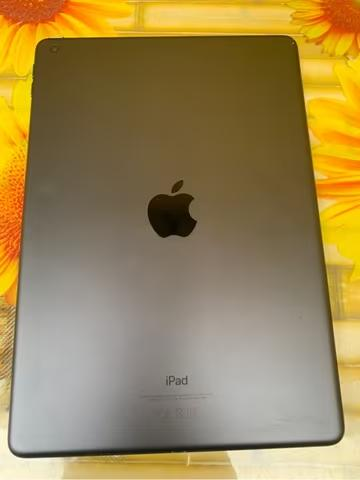

Logos:
Apple Inc.


In [28]:
detect_logos("./images-test/ipad.avif.png")